<a href="https://colab.research.google.com/github/MAKAR2007/hr-market-analysis/blob/main/_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [ ]:
import pandas as pd
import plotly.express as px

nf=pd.read_csv("netflix_titles.csv")
am=pd.read_csv("amazon_prime_titles.csv")
ds=pd.read_csv("disney_plus_titles.csv")
hu=pd.read_csv("hulu_titles.csv")



In [ ]:
def split_counts(df):
    tv = df['type'].str.contains('TV', case=False,na=False).sum()
    mv = len(df) - tv
    return mv, tv

rows = []
for name, df in [("Netflix", nf),("Amazon Prime Video", am),("Disney+", ds), ("Hulu", hu)]:
    mv, tv = split_counts(df)
    total =mv+tv
    rows.append([name, "Movies", mv, mv/total*100])
    rows.append([name, "TV Shows", tv, tv/total*100])
data=pd.DataFrame(rows, columns=["platform","kind","count","pct"])

fig=px.bar(data,x="platform",y="pct",color="kind",
             title="Фильмы vs Сериалы",
             color_discrete_sequence=["#E50914","#333333"])
fig.update_layout(yaxis_title="Доля, %", legend_title="", barmode="stack")
fig.update_traces(hovertemplate="%{x} — %{legendgroup}: %{y:.1f}%")
fig.show()

In [ ]:
launch_year = {
    "Netflix": 2007,
    "Amazon Prime Video": 2011,
    "Disney+": 2019,
    "Hulu": 2008
}

def prep(df, name):
    y=pd.to_numeric(df.get("release_year"), errors="coerce")
    out=pd.DataFrame({"platform":name,"release_year": y})
    out["post_launch"] = out["release_year"]>=launch_year[name]
    out["last5y"] = out["release_year"]>=(pd.Timestamp.now().year - 5)
    return out.dropna(subset=["release_year"])

data=pd.concat([
    prep(nf,"Netflix"),
    prep(am,"Amazon Prime Video"),
    prep(ds,"Disney+"),
    prep(hu,"Hulu")
], ignore_index=True)

share=(data.groupby("platform")["last5y"].mean()*100).round(1).reset_index(name="pct_last5y")
figC=px.bar(share, x="platform", y="pct_last5y",
              title="Доля новых тайтлов (последние 5 лет) в каталоге",
              color="platform",
              color_discrete_map={"Netflix":"#E50914","Amazon Prime Video":"#00A8E1","Disney+":"#113CCF","Hulu":"#1CE783"},
              text="pct_last5y")
figC.update_traces(textposition="outside", hovertemplate="%{x}: %{y:.1f}% последних 5 лет")
figC.update_layout(yaxis_title="Доля, %", xaxis_title="", showlegend=False)
figC.show()

In [ ]:
def explode_genres(df):
 s=df["listed_in"].fillna("").astype(str).str.split(",")
 bag=[]
 for lst in s:
  for g in lst:
   g=g.strip()
   if g:
    bag.append(g)
 out = pd.Series(bag).value_counts().reset_index()
 out.columns = ["genre","n"]
 return out

netflix_genres=explode_genres(nf).head(15).sort_values("n")
amazon_genres=explode_genres(am).head(15).sort_values("n")
disney_genres=explode_genres(ds).head(15).sort_values("n")
hulu_genres=explode_genres(hu).head(15).sort_values("n")

fig1= px.bar(netflix_genres, x="n", y="genre", orientation="h",
 color_discrete_sequence=["#E50914"], title="Топ-15 жанров: Netflix")
fig1.show()

fig2= px.bar(amazon_genres, x="n", y="genre", orientation="h",
 color_discrete_sequence=["#00A8E1"], title="Топ-15 жанров: Amazon Prime Video")
fig2.show()

fig3= px.bar(disney_genres, x="n", y="genre", orientation="h",
 color_discrete_sequence=["#113CCF"], title="Топ-15 жанров: Disney+")
fig3.show()

fig4= px.bar(hulu_genres, x="n", y="genre", orientation="h",
 color_discrete_sequence=["#1CE783"], title="Топ-15 жанров: Hulu")
fig4.show()

In [ ]:
netflix=pd.read_csv("netflix_titles.csv")
amazon=pd.read_csv("amazon_prime_titles.csv")
disney=pd.read_csv("disney_plus_titles.csv")
hulu=pd.read_csv("hulu_titles.csv")

def top_countries(df):
    countries=[]
    for val in df["country"].fillna("Unknown").astype(str):
        for c in val.split(","):
            c=c.strip()
            if c != "":
                countries.append(c)
    counts=pd.Series(countries).value_counts().reset_index()
    counts.columns=["country","titles"]
    return counts.head(20)

netflix_geo=top_countries(netflix)
amazon_geo=top_countries(amazon)
disney_geo=top_countries(disney)
hulu_geo=top_countries(hulu)

fig1=px.scatter(netflix_geo, x="titles", y="country", size="titles",
                  size_max=40, color_discrete_sequence=["#E50914"],
                  title="Топ-20 стран по числу тайтлов — Netflix")
fig1.show()

fig2=px.scatter(amazon_geo, x="titles", y="country", size="titles",
                  size_max=40, color_discrete_sequence=["#00A8E1"],
                  title="Топ-20 стран по числу тайтлов — Amazon Prime Video")
fig2.show()

fig3=px.scatter(disney_geo, x="titles", y="country", size="titles",
                  size_max=40, color_discrete_sequence=["#113CCF"],
                  title="Топ-20 стран по числу тайтлов — Disney+")
fig3.show()

fig4=px.scatter(hulu_geo, x="titles", y="country", size="titles",
                  size_max=40, color_discrete_sequence=["#1CE783"],
                  title="Топ-20 стран по числу тайтлов — Hulu")
fig4.show()

/tmp/ipython-input-4271618576.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




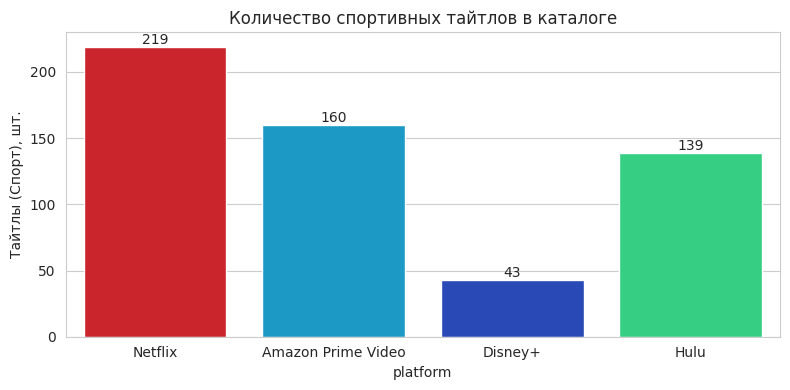

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nf.columns=[c.strip().lower() for c in nf.columns]
am.columns=[c.strip().lower() for c in am.columns]
ds.columns=[c.strip().lower() for c in ds.columns]
hu.columns=[c.strip().lower() for c in hu.columns]

netflix_sport=nf["listed_in"].fillna("").astype(str).str.contains("sport", case=False).sum()
amazon_sport=am["listed_in"].fillna("").astype(str).str.contains("sport", case=False).sum()
disney_sport=ds["listed_in"].fillna("").astype(str).str.contains("sport", case=False).sum()
hulu_sport=hu["listed_in"].fillna("").astype(str).str.contains("sport", case=False).sum()

platforms=["Netflix","Amazon Prime Video","Disney+","Hulu"]
values=[netflix_sport, amazon_sport, disney_sport, hulu_sport]

plot_df=pd.DataFrame({"platform": platforms, "sports_titles": values})

sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
ax = sns.barplot(data=plot_df, x="platform", y="sports_titles",
 palette=["#E50914","#00A8E1","#113CCF","#1CE783"])
ax.set_title("Количество спортивных тайтлов в каталоге")
ax.set_ylabel("Тайтлы (Спорт), шт.")

for p in ax.patches:
 ax.annotate(str(int(p.get_height())), (p.get_x()+p.get_width()/2, p.get_height()),
  ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

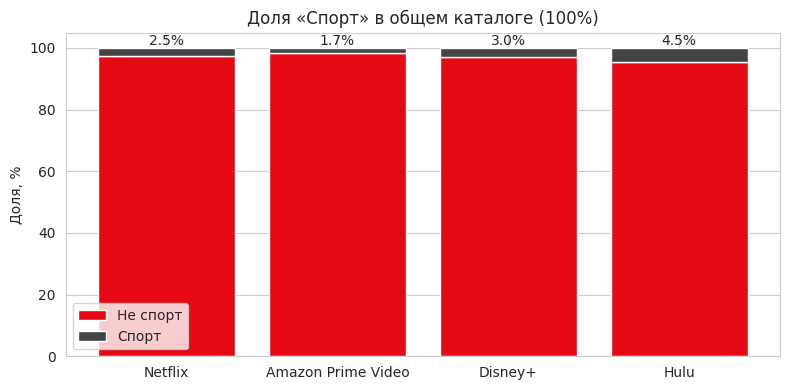

In [ ]:
for df in [nf, am, ds, hu]:
    df.columns = [c.strip().lower() for c in df.columns]

def split_sport_share(df):
    col = "listed_in" if "listed_in" in df.columns else "genres"
    is_sport = df[col].fillna("").astype(str).str.contains("sport", case=False, na=False)
    sport = int(is_sport.sum())
    total = len(df)
    non_sport = total - sport
    return sport, non_sport

platforms = ["Netflix","Amazon Prime Video","Disney+","Hulu"]
blocks = {"platform": [], "sport": [], "non_sport": []}

for name, df in zip(platforms, [nf, am, ds, hu]):
    s, ns = split_sport_share(df)
    blocks["platform"].append(name)
    blocks["sport"].append(s)
    blocks["non_sport"].append(ns)

stack = pd.DataFrame(blocks)
stack["sport_pct"] = stack["sport"] / (stack["sport"] + stack["non_sport"]) * 100
stack["non_sport_pct"] = 100 - stack["sport_pct"]

plt.figure(figsize=(8,4))
plt.bar(stack["platform"], stack["non_sport_pct"], color="#E50914", label="Не спорт")
plt.bar(stack["platform"], stack["sport_pct"], bottom=stack["non_sport_pct"],
        color="#444444", label="Спорт")
plt.title("Доля «Спорт» в общем каталоге (100%)")
plt.ylabel("Доля, %")
plt.legend()

for i, v in enumerate(stack["sport_pct"].round(1)):
    plt.text(i, 100, f"{v}%", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()

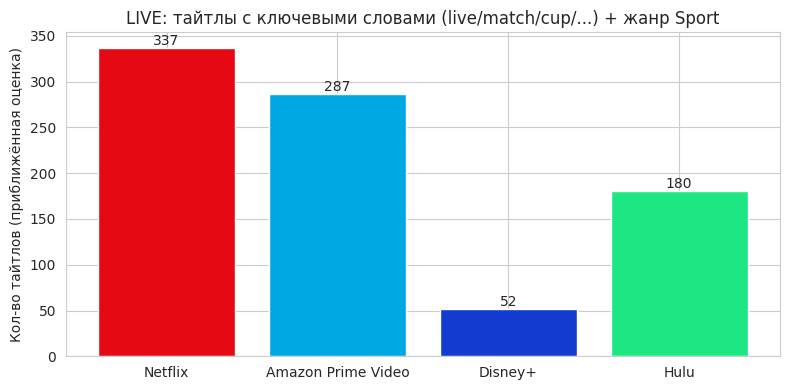

In [ ]:
nf.columns = [c.strip().lower() for c in nf.columns]
am.columns = [c.strip().lower() for c in am.columns]
ds.columns = [c.strip().lower() for c in ds.columns]
hu.columns = [c.strip().lower() for c in hu.columns]

keywords = ["live", "match", "cup", "tournament", "final", "slam", "open"]

titles_nf = nf["title"].fillna("").str.lower()
genres_nf = nf["listed_in"].fillna("").str.lower()
count_nf = 0
for w in keywords:
    count_nf += titles_nf.str.contains(w, na=False).sum()
count_nf += genres_nf.str.contains("sport", na=False).sum()

titles_am = am["title"].fillna("").str.lower()
genres_am = am["listed_in"].fillna("").str.lower()
count_am = 0
for w in keywords:
    count_am += titles_am.str.contains(w, na=False).sum()
count_am += genres_am.str.contains("sport", na=False).sum()

titles_ds = ds["title"].fillna("").str.lower()
genres_ds = ds["listed_in"].fillna("").str.lower()
count_ds = 0
for w in keywords:
    count_ds += titles_ds.str.contains(w, na=False).sum()
count_ds += genres_ds.str.contains("sport", na=False).sum()

titles_hu=hu["title"].fillna("").str.lower()
genres_hu=hu["listed_in"].fillna("").str.lower()
count_hu=0
for w in keywords:
    count_hu+=titles_hu.str.contains(w, na=False).sum()
count_hu+=genres_hu.str.contains("sport", na=False).sum()

platforms=["Netflix","Amazon Prime Video","Disney+","Hulu"]
values=[count_nf, count_am, count_ds, count_hu]

plt.figure(figsize=(8,4))
plt.bar(platforms, values, color=["#E50914","#00A8E1","#113CCF","#1CE783"])
plt.title("LIVE: тайтлы с ключевыми словами (live/match/cup/...) + жанр Sport")
plt.ylabel("Кол-во тайтлов (приближённая оценка)")

for i, v in enumerate(values):
    plt.text(i,v,str(int(v)), ha="center", va="bottom")

plt.tight_layout()
plt.show()

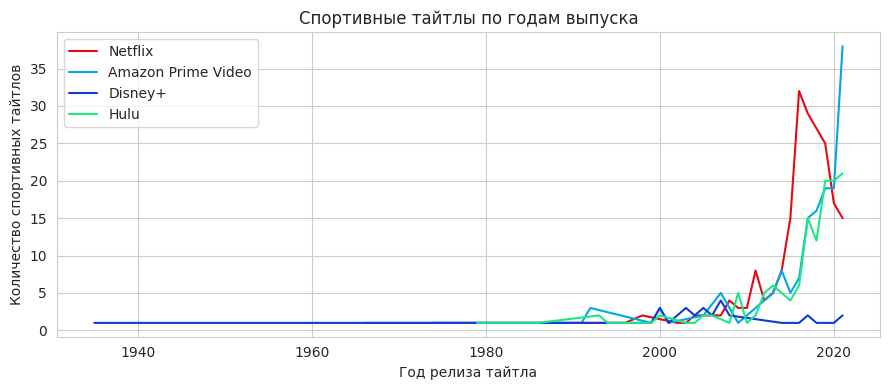

In [ ]:
for df in [nf, am, ds, hu]:
    df.columns = [c.strip().lower() for c in df.columns]

def sport_years(df, name):
    col = "listed_in" if "listed_in" in df.columns else "genres"
    mask = df[col].fillna("").str.contains("sport", case=False, na=False)
    sub = df.loc[mask, ["release_year"]].copy()
    sub["release_year"] = pd.to_numeric(sub["release_year"], errors="coerce")
    sub = sub.dropna()
    sub["platform"] = name
    return sub

parts = []
for name, df in zip(["Netflix","Amazon Prime Video","Disney+","Hulu"], [nf, am, ds, hu]):
    parts.append(sport_years(df, name))
line = pd.concat(parts, ignore_index=True)

# агрегация по годам
agg = (line.groupby(["platform","release_year"]).size()
             .reset_index(name="count"))

colors = {"Netflix":"#E50914",
          "Amazon Prime Video":"#00A8E1",
          "Disney+":"#113CCF",
          "Hulu":"#1CE783"}

plt.figure(figsize=(9,4))
for plat in ["Netflix","Amazon Prime Video","Disney+","Hulu"]:
    tmp = agg[agg["platform"]==plat].sort_values("release_year")
    plt.plot(tmp["release_year"], tmp["count"],
             label=plat, color=colors[plat])

plt.title("Спортивные тайтлы по годам выпуска")
plt.xlabel("Год релиза тайтла")
plt.ylabel("Количество спортивных тайтлов")
plt.legend()
plt.tight_layout()
plt.show()